In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("free4ever1/instagram-fake-spammer-genuine-accounts")

# print("Path to dataset files:", path)

In [7]:
train_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\train.csv");
test_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\test.csv");
#df.head()

In [8]:
train_data.describe()
test_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [9]:
train_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

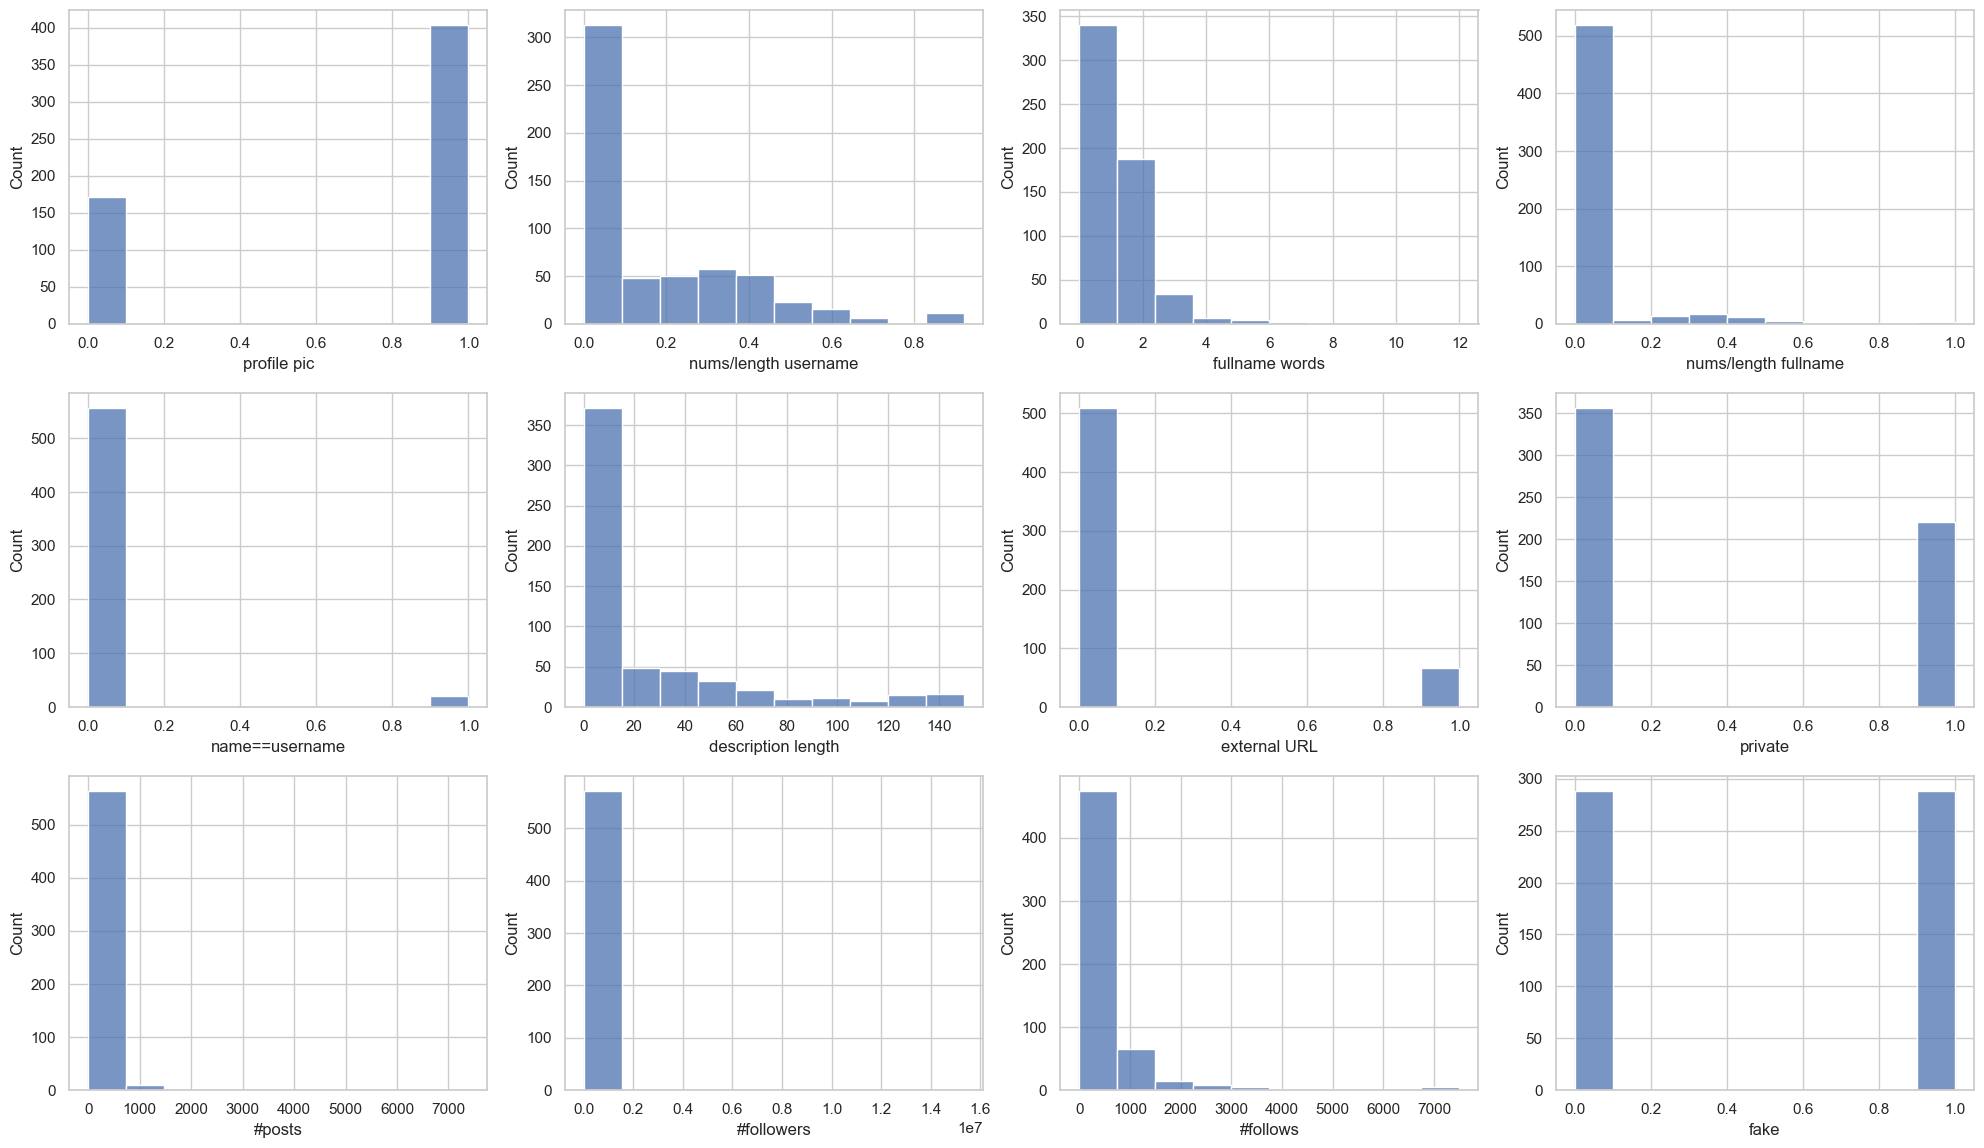

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np  # Import numpy for NaN

# Set the style of seaborn plot
sns.set(style="whitegrid")

column_names = train_data.columns
# List of features
features = list(column_names)

# Plot histograms for each feature with NaN handling
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    df_clean = train_data[feature].replace([np.inf, -np.inf], np.nan)  # Replace inf and -inf with NaN
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_clean, kde=False, bins=10)

plt.tight_layout()
plt.show()

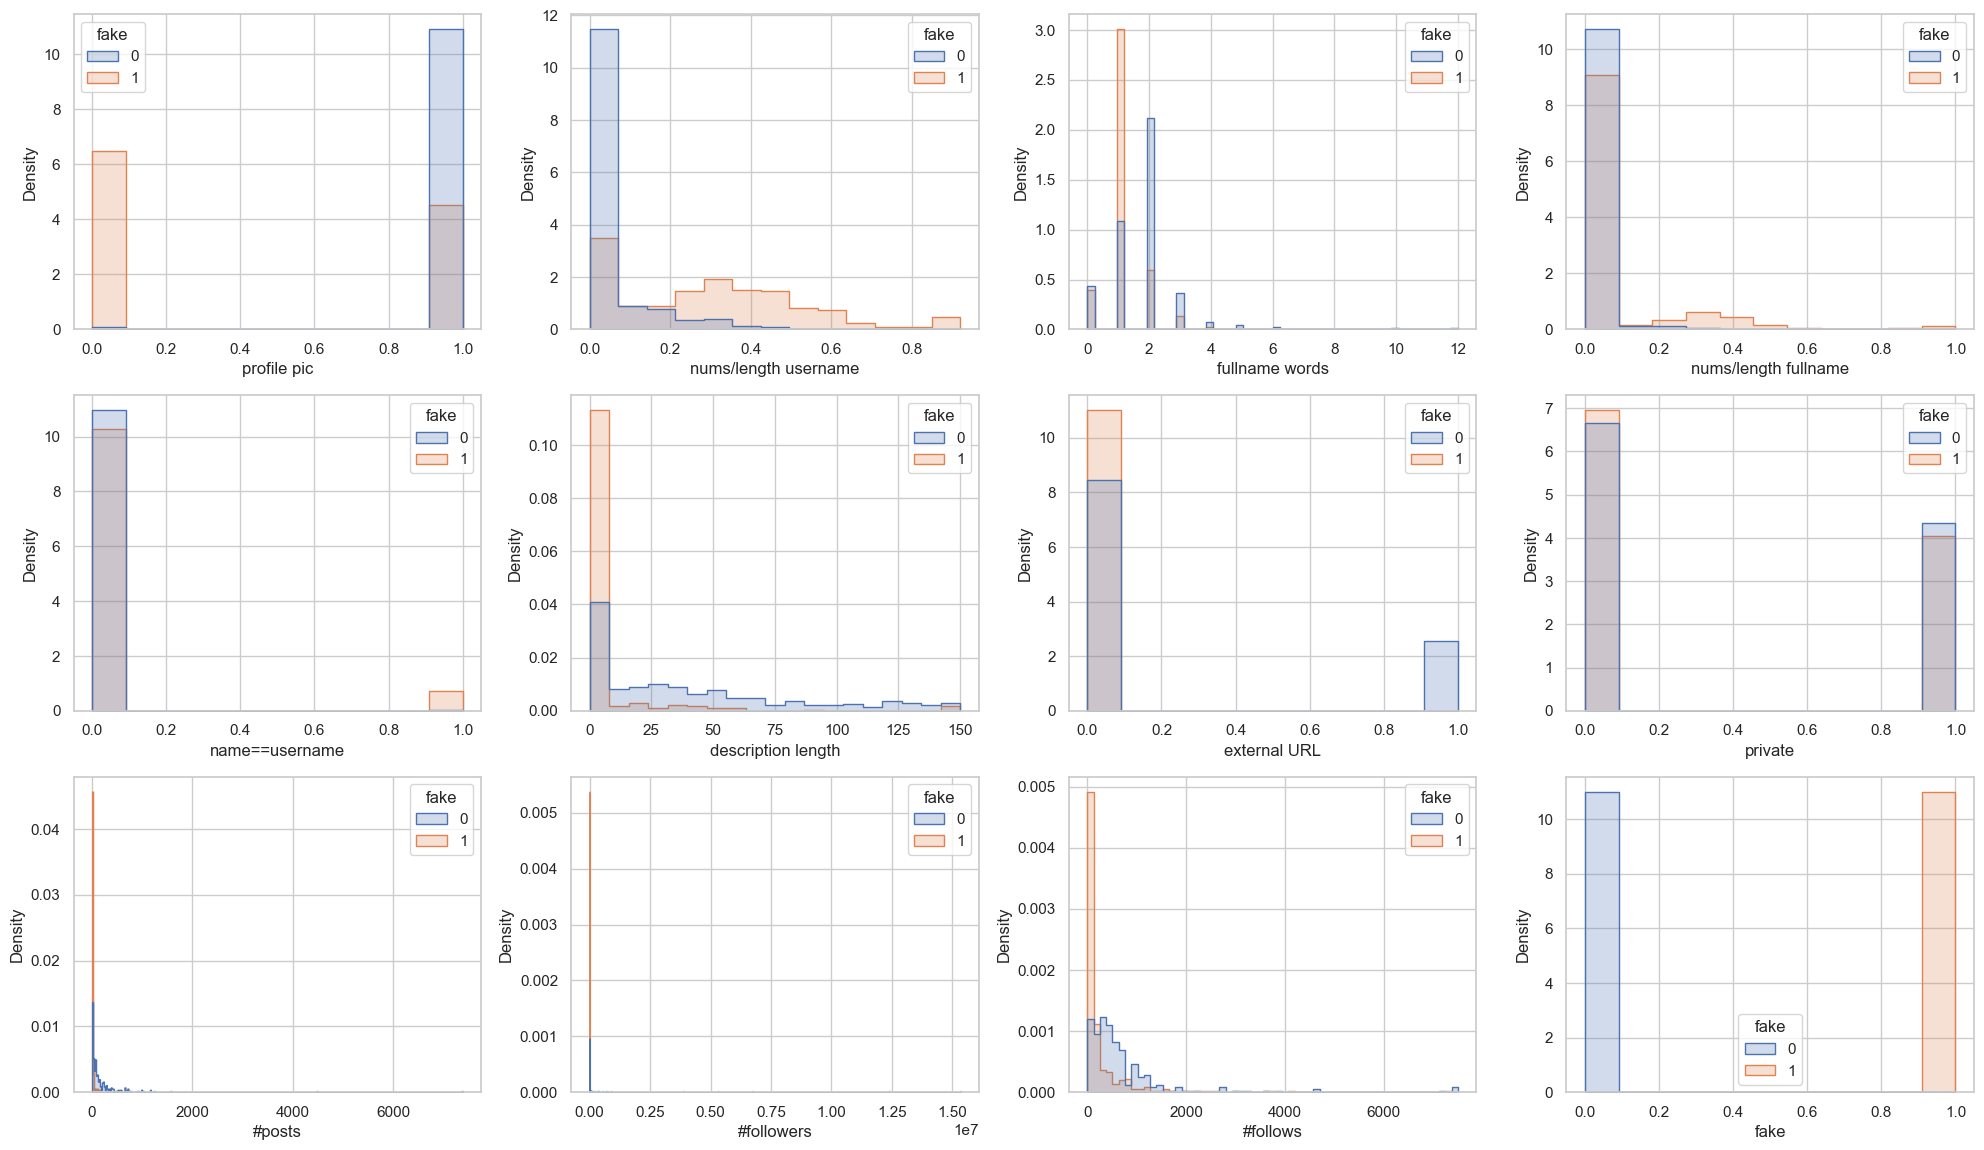

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np  # Import numpy for NaN (from previous code)

# ... (rest of your code)

# Plot the distribution of each feature with respect to the target variable 'fake'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(
        data=train_data,  # Use train_data instead of df
        x=feature,
        hue="fake",  # Use quotes for clarity
        element="step",
        stat="density",
        common_norm=False
    )
plt.tight_layout()
plt.show()

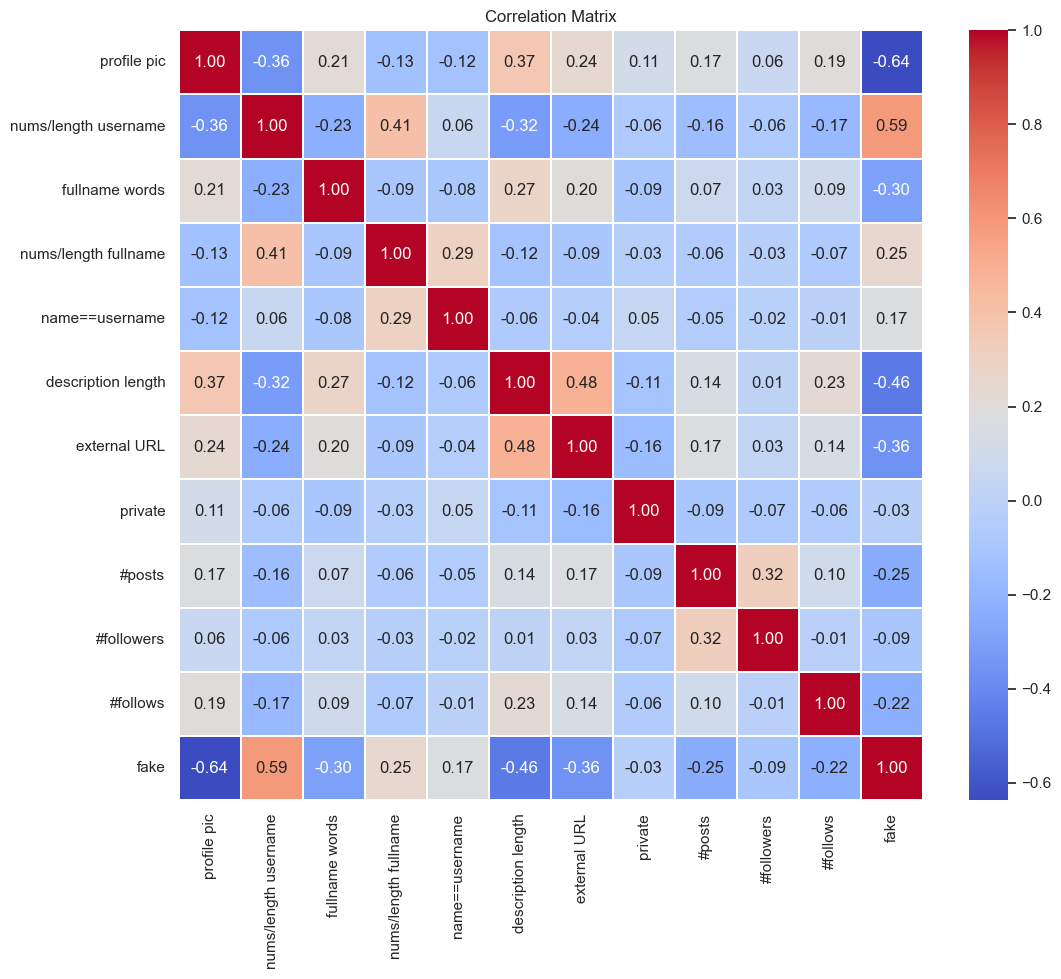

In [12]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix")
plt.show()

# Trying model on limited features

In [13]:
#Using only profile pic, nums/length username , desc length, fullname words, external url
columns_to_keep = [
    'profile pic',
    'nums/length username',
    'description length',
    'fullname words',
    'external URL', 
]
X1_train = train_data[columns_to_keep]
y1_train = train_data["fake"]
X1_test  = test_data[columns_to_keep]
y1_test  = test_data["fake"]
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   description length    576 non-null    int64  
 3   fullname words        576 non-null    int64  
 4   external URL          576 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 22.6 KB


In [14]:
# Standardize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [15]:
# Train a logistic regression model
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)

LogisticRegression()

In [16]:
# Make predictions on the test set
y1_pred = model1.predict(X1_test)

In [17]:
# Print a classification report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        60
           1       0.88      0.85      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



# With All Variables

In [18]:
X2_train = train_data.drop(["fake"],axis=1)
y2_train = train_data["fake"]
X2_test  = test_data.drop(["fake"],axis=1)
y2_test  = test_data["fake"]
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB


In [19]:
# Standardize the features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)


In [20]:
# Train a logistic regression model
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

LogisticRegression()

In [21]:
# Make predictions on the test set
y2_pred = model2.predict(X2_test)

In [22]:
# Print a classification report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


# EML Implementation

In [24]:
input_length= X2_train.shape[1]
hidden_units=10
Win= np.random.normal(size=[input_length,hidden_units])
Win.shape

(11, 10)

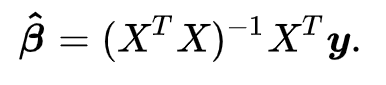

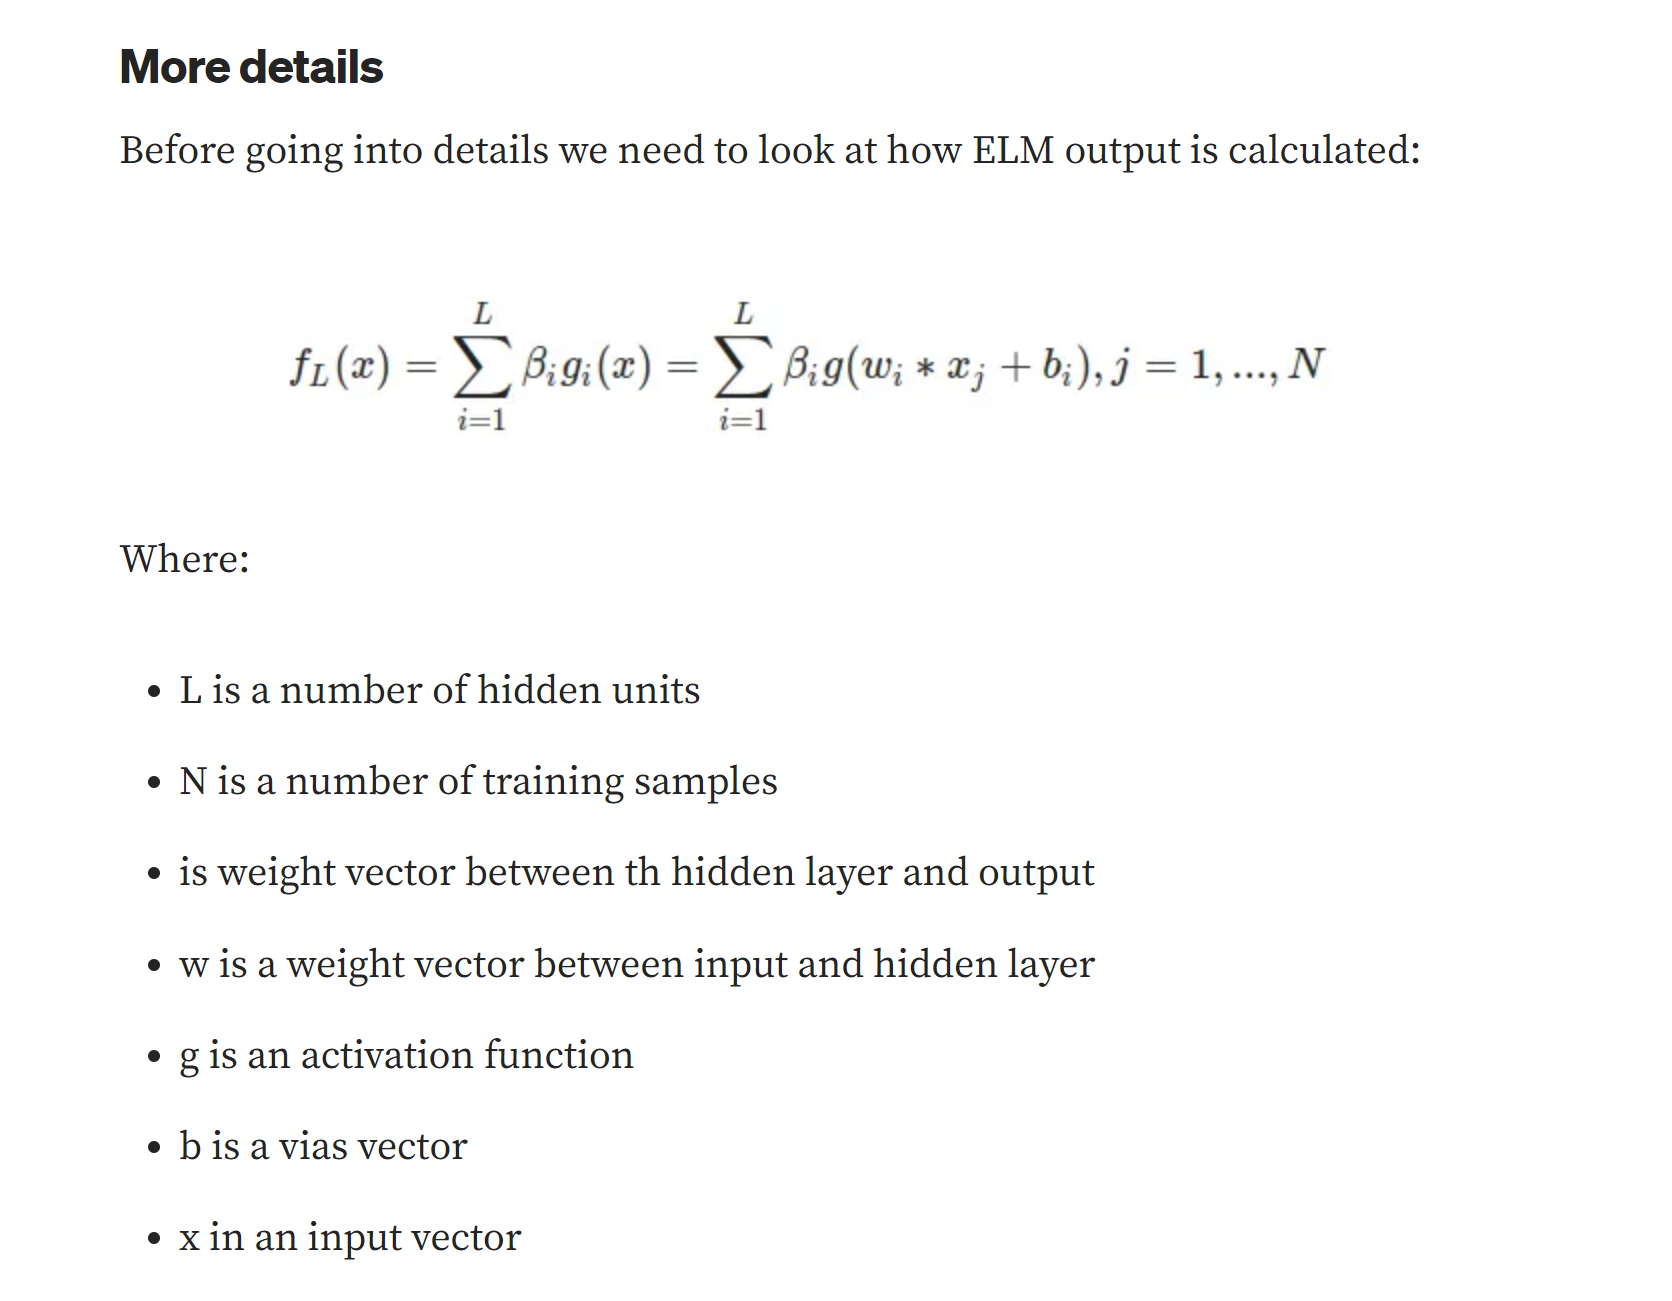
From towards data science

In [25]:
def convert_to_hidden(x):
    a=np.dot(x,Win)
    a=np.maximum(a,0,a);
    return a